In [4]:
# Import necessary libraries

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

In [7]:
# Load the Titanic dataset from kaggle webdata

In [14]:
df= pd.read_csv('C:/Users/abhij/Downloads/titanic.csv')


In [ ]:
#Explore the dataset



In [16]:
# Display the first few rows of the DataFrame 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
#Display descriptive statistics of numerical columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
# Display descriptive statistics of all columns, including categorical ones
print(df.describe(include='all'))

        PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique     

In [19]:
#Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [20]:
#Display the count of missing values for each column

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
#Calculate the percentage of missing values for each column
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

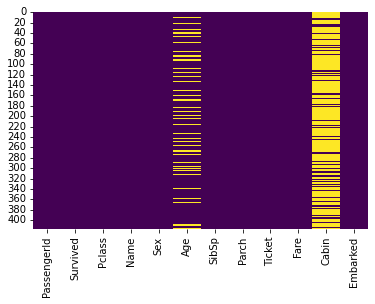

In [24]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [25]:
import numpy as np

In [26]:
#Replace missing values in the 'Age' column with the mean

In [27]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)

In [28]:
#Replace missing values in the 'Fare' column with the mean

In [29]:
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)

In [30]:
#Drop the 'Cabin' column

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df.drop('Cabin', axis=1,inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [34]:
#Display the count of missing values after handling missing data

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
#Display the number of unique values for each column

In [37]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [38]:
#seperate list of categorical and numerical variables

In [39]:
cat_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_var = ['Age', 'Fare']

In [40]:
# Calculate the percentage distribution of 'Survived' variable and round to 2 decimal places

In [41]:
round(df['Survived'].value_counts(normalize=True)*100, 2)

0    63.64
1    36.36
Name: Survived, dtype: float64

In [42]:
# The dataset exhibits a slight imbalance, with 36.36% of passengers having survived the Titanic disaster and 63.64% of passengers not surviving.

In [43]:
#Create a countplot for 'Survived'

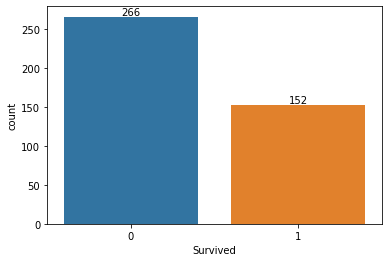

In [45]:
ax = sns.countplot(x=df['Survived'])
ax.bar_label(ax.containers[0])
plt.show()

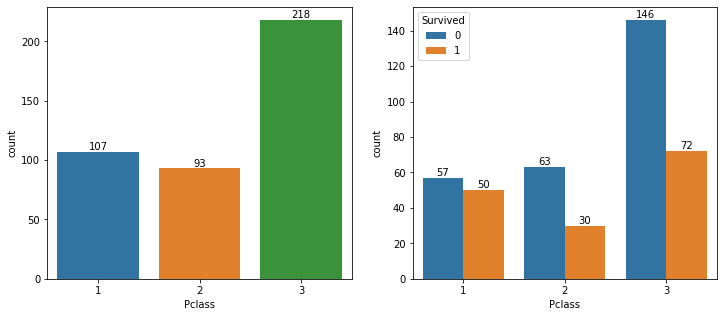

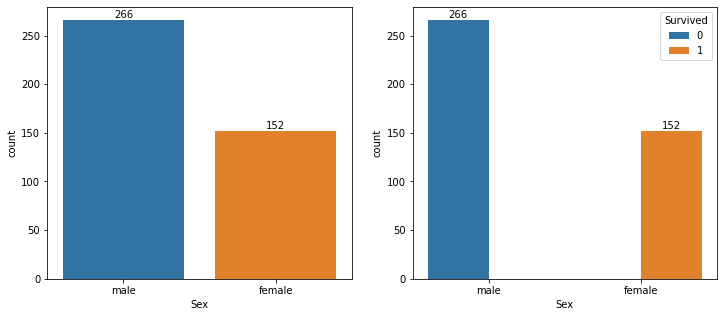

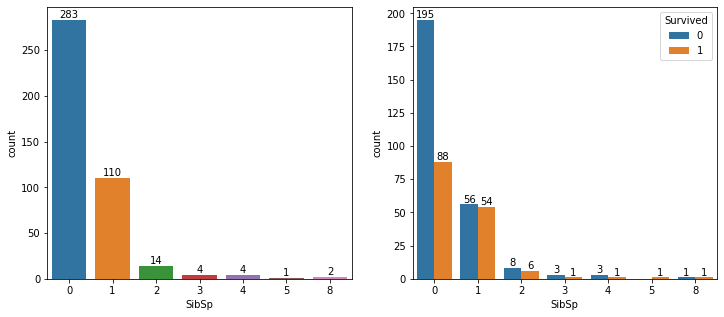

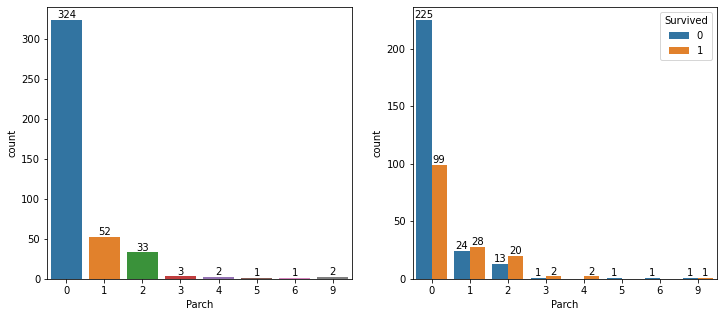

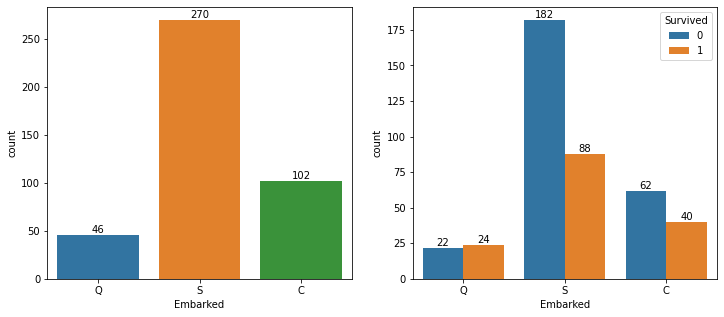

In [47]:
# Loop through categorical variables
for column in cat_var:   
    plt.figure(figsize=(12,5))
    
 # Plot count for each category
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df)
    ax.bar_label(ax.containers[0])
    
# Plot count for each category with 'Survived' as hue
    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()


In [48]:
# Display summary statistics for numerical variables
df[num_var].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


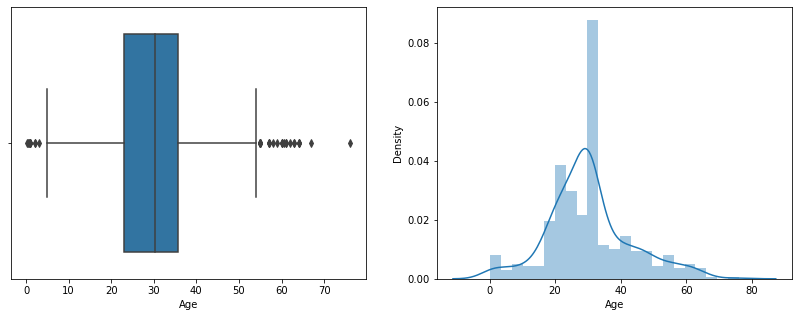

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


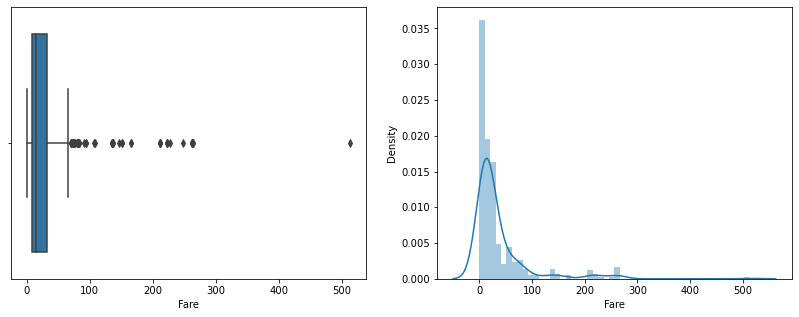

In [52]:
for column in num_var:
    plt.figure(figsize=(14,5))

# Boxplot
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])
    
# Distribution plot
    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

In [53]:
# Scatter plot with 'Age' on the x-axis, 'Fare' on the y-axis, and colored by 'Survived'

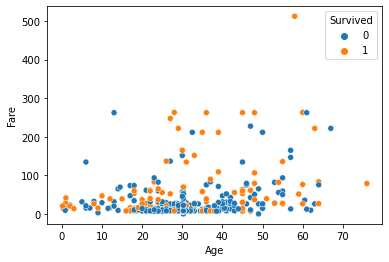

In [54]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

In [56]:
#Scatter plot with 'Age' on the x-axis, 'Fare' on the y-axis, and colored by 'Pclass'

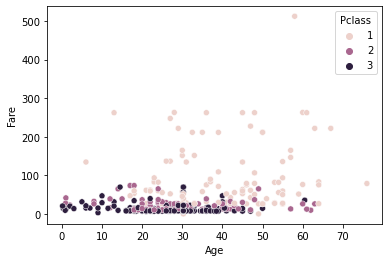

In [57]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

In [58]:
# Drop specified features from the DataFrame

In [59]:
df_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [60]:
# Replace 'male' with 1 and 'female' with 0 in the 'Sex' column

df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
# Replace 'Q' with 0, 'S' with 1, and 'C' with 2 in the 'Embarked' column

df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


In [61]:
#Create a heatmap of the correlation matrix

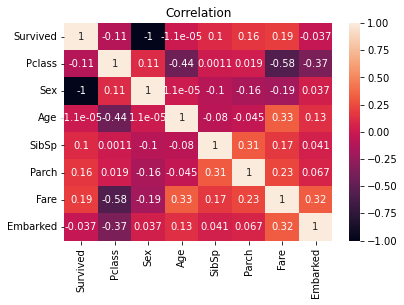

In [63]:
sns.heatmap(df_update.corr(), annot=True)
plt.title('Correlation')
plt.show()

In [64]:
#Construct and Evaluate Models

In [65]:
#1. Logistic regression model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [67]:
X = df_update.drop('Survived', axis=1)
y = df_update['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [68]:
# Split data into training and testing sets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [71]:
# Print the coefficients

In [72]:
LR.coef_

array([[-1.74119861e-02, -6.13296717e+00,  1.66476576e-04,
         6.07173662e-02, -1.04682737e-02,  4.61858440e-03,
        -2.33452414e-01]])

In [74]:
#Print the intercept

In [75]:
LR.intercept_

array([2.84084438])

In [76]:
#save predictions

In [77]:
y_pred_train = LR.predict(X_train)

In [78]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [79]:
#Save predictions

In [80]:
y_pred_LR = LR.predict(X_test)

In [81]:
#Print out the predicted labels

In [82]:
LR.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [83]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))
print('Precision: ', precision_score(y_test, y_pred_LR))
print('Recall: ', recall_score(y_test, y_pred_LR))
print('F1 Score: ', f1_score(y_test, y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [84]:
#Create confusion matrix

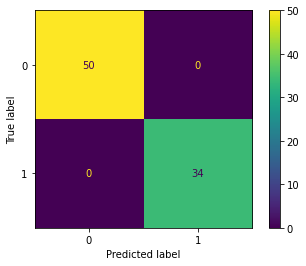

In [85]:
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

In [86]:
# 2. K-Nearest Neighbour

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [88]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))
print('F1 Score: ', f1_score(y_test, y_pred_knn))

Accuracy:  0.6190476190476191
Precision:  0.5555555555555556
Recall:  0.29411764705882354
F1 Score:  0.3846153846153846


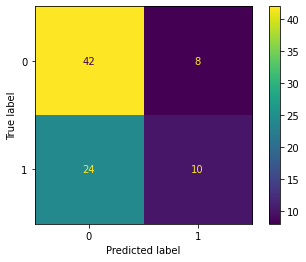

In [89]:
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

In [90]:
# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [92]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))
print('Precision: ', precision_score(y_test, y_pred_tree))
print('Recall: ', recall_score(y_test, y_pred_tree))
print('F1 Score: ', f1_score(y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


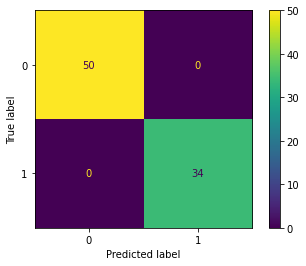

In [93]:
cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

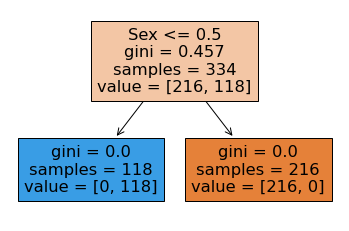

In [94]:
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=list(X.columns)) 
plt.show()

In the Titanic dataset, 36.36% of passengers survived, while 63.64% did not survive. All females survived, whereas none of the males survived. A significant number of passengers in classes 3 and 2 did not survive. Passengers without siblings/spouses or parents/children aboard had lower chances of survival. Those embarking from Queenstown had a higher likelihood of survival, while those embarking from Southampton had lower chances.

Both the Logistic Regression and Decision Tree models achieved 100% accuracy.